# Step #1 Load the Data

In [29]:
# A tutorial for this file is available at www.relataly.com

import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support as score

# The Data can be downloaded from Kaggle.com: https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv
path = 'data/crime/credit-card-transactions/'
df = pd.read_csv(f'{path}creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Step #2 Data Exploration

<ipython-input-30-40f5597dfd34>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_base = df.drop(['Time','Amount', 'Class'], 1)


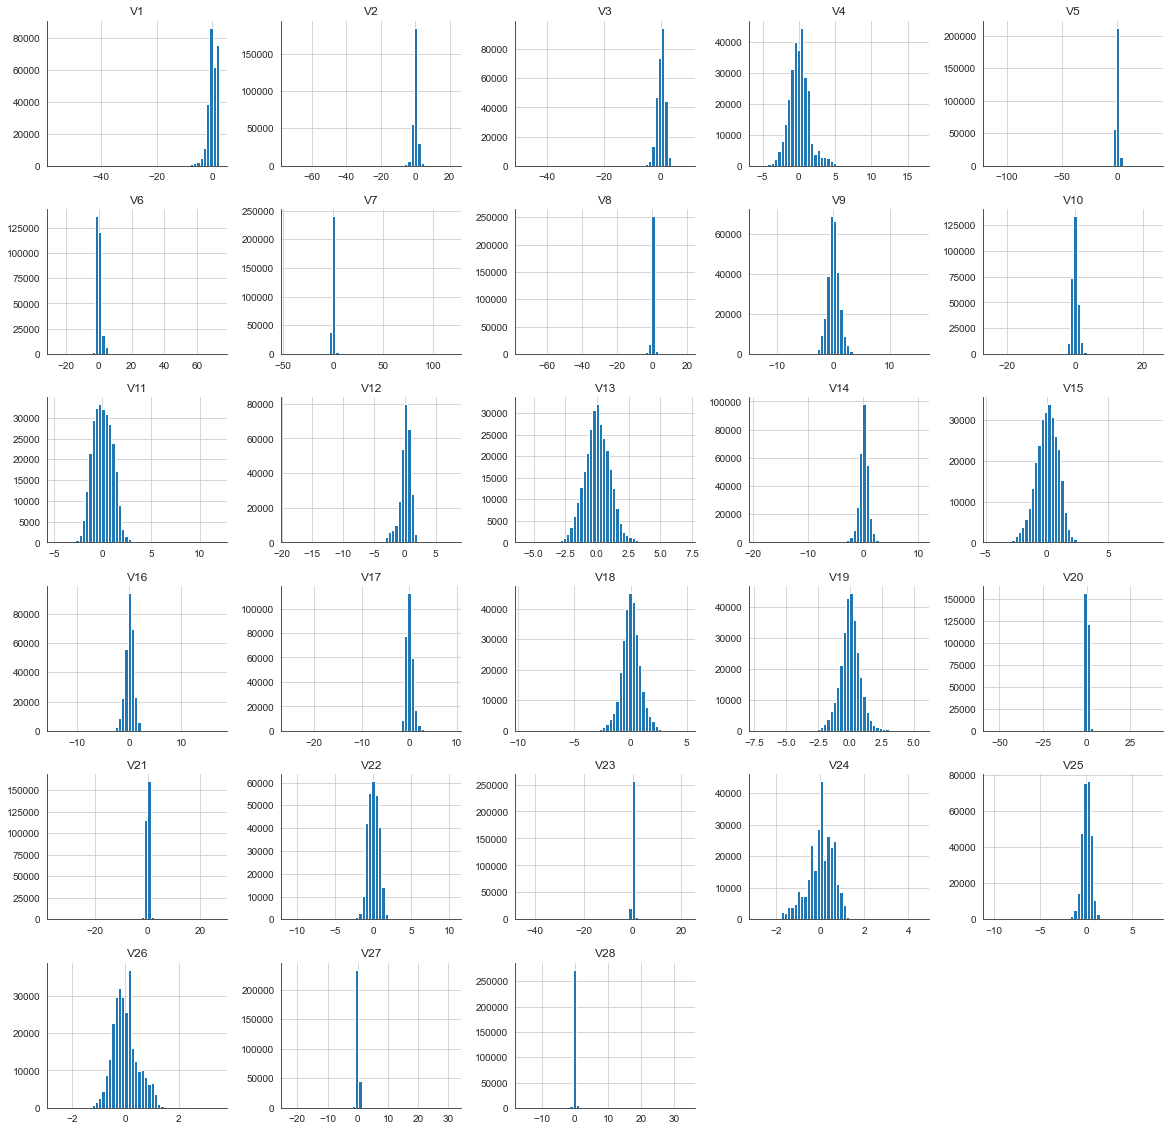

In [30]:
# create histograms on all features
df_base = df.drop(['Time','Amount', 'Class'], 1)
df_base.hist(figsize=(20,20), bins = 50)
plt.show()

<AxesSubplot:>

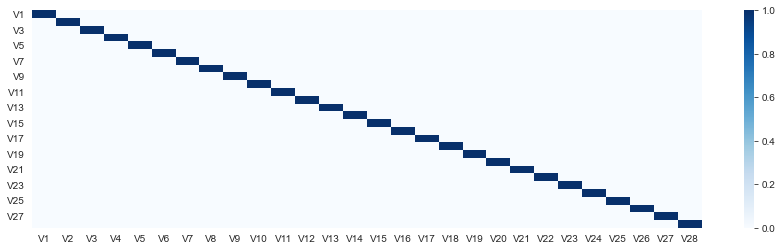

In [31]:
# Check that features are uncorrelated
plt.figure(figsize=(15,4))
f_cor = df_base.corr()
sns.heatmap(f_cor, cmap="Blues")

In [32]:
df_base

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


([<matplotlib.patches.Wedge at 0x1e51ae4ff70>,
 [Text(-0.7820271852666786, -0.7735848250217141, '0'),
  Text(0.8531205024736381, 0.8439107821678352, '1')],
 [Text(-0.42656028287273373, -0.4219553591027531, '99.83%'),
  Text(0.4976536264429556, 0.49228128959790385, '0.17%')])

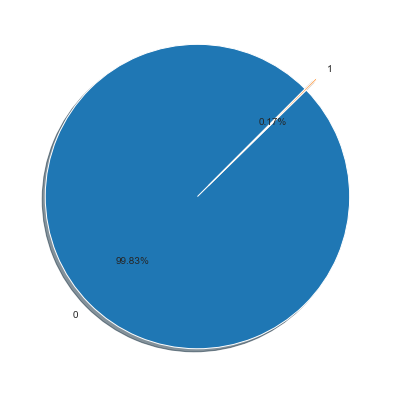

In [33]:
# Plot the balance of class labels
fig1, ax1 = plt.subplots(figsize=(14, 7))
plt.pie(df[['Class']].value_counts(), explode=[0,0.1], labels=[0,1], autopct='%1.2f%%', shadow=True, startangle=45)

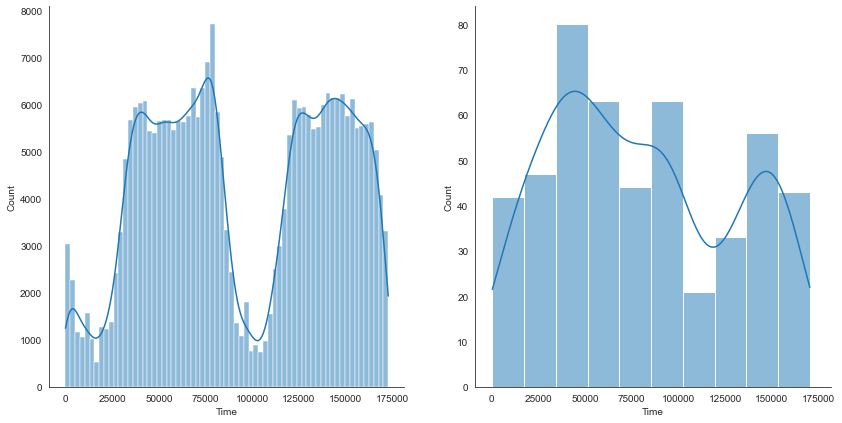

In [34]:
# Plot istribution of the Time variable, which contains transaction data for two days
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(14, 7))
sns.histplot(data=df[df['Class'] == 0], x='Time', kde=True, ax=ax[0])
sns.histplot(data=df[df['Class'] == 1], x='Time', kde=True, ax=ax[1])
plt.show()

Text(0.5, 0.98, 'Transaction Amount over Time split by Class')

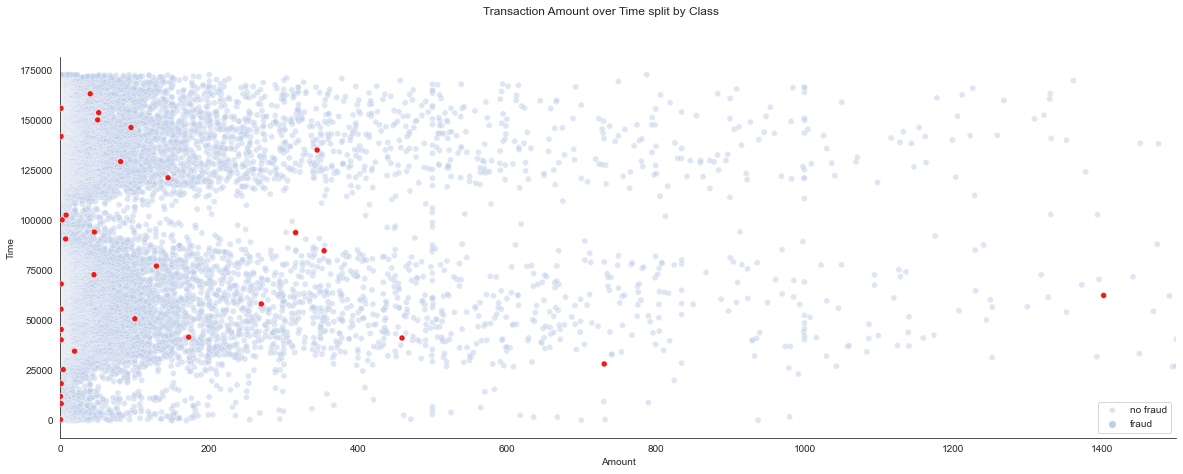

In [35]:
# Plot time against amount
fig, ax = plt.subplots(figsize=(20, 7))
ax.set(xlim=(0, 1500))
sns.scatterplot(data=df[df['Class']==0][::15], x='Amount', y='Time', hue="Class", palette=["#BECEE9"], alpha=.5, ax=ax)
sns.scatterplot(data=df[df['Class']==1][::15], x='Amount', y='Time', hue="Class", palette=["#EF1B1B"], zorder=100, ax=ax)
plt.legend(['no fraud', 'fraud'], loc='lower right')
fig.suptitle('Transaction Amount over Time split by Class')

# Step #3 Data Preprocessing

In [36]:
# Separate the classes from the train set
df_classes = df['Class']
df_train = df.drop(['Class'], axis=1)

# split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(df_train, df_classes, test_size=0.30, random_state=42)

# Step #4 Train Models

# 4.1 Isolation Forest

In [37]:
# train the model on the nominal train set
model_isf = IsolationForest().fit(X_train)

Isolation Forest (baseline) model
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     82308
           1       0.83      0.04      0.07      3135

    accuracy                           0.96     85443
   macro avg       0.90      0.52      0.53     85443
weighted avg       0.96      0.96      0.95     85443

f1_score: 52.55%


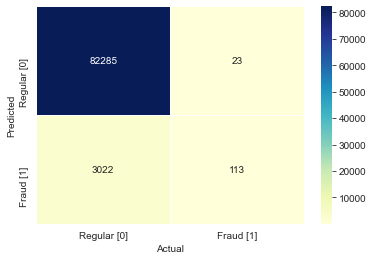

In [38]:
def measure_performance(model, X_test, y_true, map_labels):
    # predict on testset
    df_pred_test = X_test.copy()
    #df_pred_test['Class'] = y_test
    df_pred_test['Pred'] = model.predict(X_test)
    if map_labels:
        df_pred_test['Pred'] = df_pred_test['Pred'].map({1: 0, -1: 1})
    #df_pred_test['Outlier_Score'] = model.decision_function(X_test)

    # measure performance
    #y_true = df_pred_test['Class']
    x_pred = df_pred_test['Pred'] 
    matrix = confusion_matrix(x_pred, y_true)

    sns.heatmap(pd.DataFrame(matrix, columns = ['Actual', 'Predicted']),
                xticklabels=['Regular [0]', 'Fraud [1]'], 
                yticklabels=['Regular [0]', 'Fraud [1]'], 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    
    print(classification_report(x_pred, y_true))
    
    model_score = score(x_pred, y_true,average='macro')
    print(f'f1_score: {np.round(model_score[2]*100, 2)}%')
    
    return model_score

model_name = 'Isolation Forest (baseline)'
print(f'{model_name} model')

map_labels = True
model_score = measure_performance(model_isf, X_test, y_test, map_labels)

performance_df = pd.DataFrame().append({'model_name':model_name, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

Best: [0.00024948 0.00022555 0.00022638 0.00026413 0.00026736 0.00022137], using {'bootstrap': True, 'max_features': 10, 'n_estimators': 50}
Isolation Forest (tuned) model
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     82335
           1       0.81      0.04      0.07      3108

    accuracy                           0.96     85443
   macro avg       0.89      0.52      0.52     85443
weighted avg       0.96      0.96      0.95     85443

f1_score: 52.49%


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.639712,0.036470,0.980891,0.052028,True,1.0,50,"{'bootstrap': True, 'max_features': 1.0, 'n_es...",0.000311,0.000218,0.000220,0.000249,0.000044,3
1,0.882181,0.022049,2.006154,0.079807,True,1.0,100,"{'bootstrap': True, 'max_features': 1.0, 'n_es...",0.000259,0.000219,0.000198,0.000226,0.000026,5
2,0.382751,0.053152,0.630909,0.002625,True,5,50,"{'bootstrap': True, 'max_features': 5, 'n_esti...",0.000280,0.000188,0.000211,0.000226,0.000039,4
3,0.469751,0.051000,1.258145,0.039134,True,5,100,"{'bootstrap': True, 'max_features': 5, 'n_esti...",0.000331,0.000189,0.000272,0.000264,0.000058,2
4,0.409143,0.010234,0.732002,0.009685,True,10,50,"{'bootstrap': True, 'max_features': 10, 'n_est...",0.000335,0.000207,0.000260,0.000267,0.000052,1
5,0.591258,0.051200,1.425156,0.035541,True,10,100,"{'bootstrap': True, 'max_features': 10, 'n_est...",0.000248,0.000198,0.000218,0.000221,0.000021,6


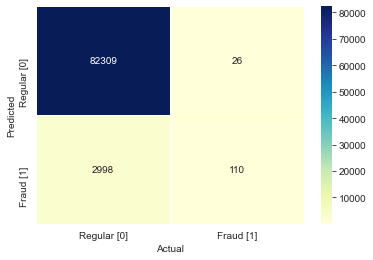

In [39]:
# Define the parameter grid
n_estimators=[50, 100]
max_features=[1.0, 5, 10]
bootstrap=[True]
param_grid = dict(n_estimators=n_estimators, max_features=max_features, bootstrap=bootstrap)
contamination_rate = 'auto' # the contamination rates determines how many outliers we expect in the data. 

# Build the gridsearch
model_isf = IsolationForest(n_estimators=n_estimators, 
                            max_features=max_features, 
                            contamination=contamination_rate, 
                            bootstrap=False, 
                            n_jobs=-1)

# Define an f1_scorer
f1sc = make_scorer(f1_score, average='macro')

grid = GridSearchCV(estimator=model_isf, param_grid=param_grid, cv = 3, scoring=f1sc)
grid_results = grid.fit(X=X_train, y=y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)

# Evaluate model performance
model_name = 'Isolation Forest (tuned)'
print(f'{model_name} model')

best_model = grid_results.best_estimator_
map_labels = True # if True - maps 1 to 0 and -1 to 1 - not required for scikit-learn knn models
model_score = measure_performance(best_model, X_test, y_test, map_labels)
performance_df = performance_df.append({'model_name':model_name, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)
results_df

# 4.2 Local Outlier Factor

LOF (baseline) model


c:\Users\Flo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     81936
           1       0.46      0.02      0.03      3507

    accuracy                           0.96     85443
   macro avg       0.71      0.51      0.51     85443
weighted avg       0.94      0.96      0.94     85443

f1_score: 50.68%


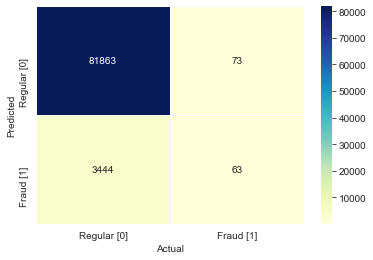

In [40]:
# Train a tuned local outlier factor model
model_lof = LocalOutlierFactor(n_neighbors=3, contamination=contamination_rate, novelty=True)
model_lof.fit(X_train)

# Evaluate model performance
model_name = 'LOF (baseline)'
print(f'{model_name} model')

map_labels = True 
model_score = measure_performance(model_lof, X_test, y_test, map_labels)
performance_df = performance_df.append({'model_name':model_name, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

# 4.3 K-Means

KNN (baseline) model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85437
           1       0.04      1.00      0.08         6

    accuracy                           1.00     85443
   macro avg       0.52      1.00      0.54     85443
weighted avg       1.00      1.00      1.00     85443

f1_score: 54.19%


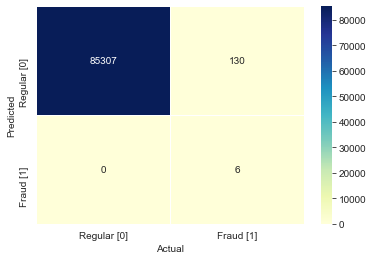

In [41]:
# Train a KNN Model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X=X_train, y=y_train)

# Evaluate model performance
model_name = 'KNN (baseline)'
print(f'{model_name} model')

map_labels = False # if True - maps 1 to 0 and -1 to 1 - set to False for classification models (e.g., KNN)
model_score = measure_performance(model_knn, X_test, y_test, map_labels)
performance_df = performance_df.append({'model_name':model_name, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)

In [42]:
# Define hypertuning parameters
n_neighbors=[1, 2, 3, 4, 5]
param_grid = dict(n_neighbors=n_neighbors)

# Build the gridsearch
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
grid = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv = 5, scoring=f1sc)
grid_results = grid.fit(X=X_train, y=y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)

# Evaluate model performance
model_name = 'KNN (tuned)'
print(f'{model_name} model')

best_model = grid_results.best_estimator_
map_labels = False # if True - maps 1 to 0 and -1 to 1 - set to False for classification models (e.g., KNN)
model_score = measure_performance(best_model, X_test, y_test, map_labels)
performance_df = performance_df.append({'model_name':model_name, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True)
results_df

# Step #5 Comparing Model Performance

                    model_name  f1_score  precision    recall
0  Isolation Forest (baseline)  0.891624   0.518855  0.527879


Text(0.5, 1.0, 'Model Outlier Detection Performance (Macro)')

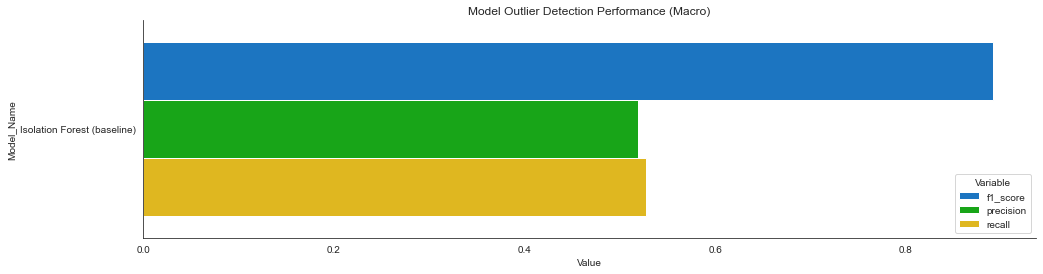

In [ ]:
print(performance_df)

# sort the prediction values
performance_df = performance_df.sort_values('model_name')

# create the barchart grouped by model
fig, ax = plt.subplots(figsize=(16, 4))
tidy = performance_df.melt(id_vars='model_name').rename(columns=str.title)
sns.barplot(y='Model_Name', x='Value', hue='Variable', data=tidy, ax=ax, palette='nipy_spectral', linewidth=1, edgecolor="w")
plt.title('Model Outlier Detection Performance (Macro)')